In [4]:
import os.path
import time
import pylab as pl
import numpy as np
from scipy import rand
from scipy.io import loadmat
%pylab inline
import os
import time
from scipy.io import savemat, loadmat
import copy
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import scipy
import math
from scipy import stats
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
sns.set()

Populating the interactive namespace from numpy and matplotlib


/Users/gracemclaughlin/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


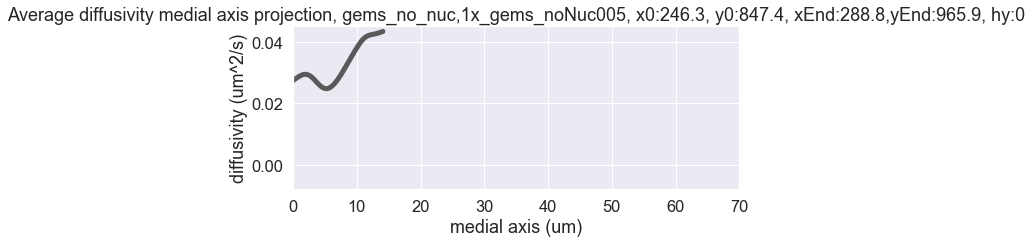

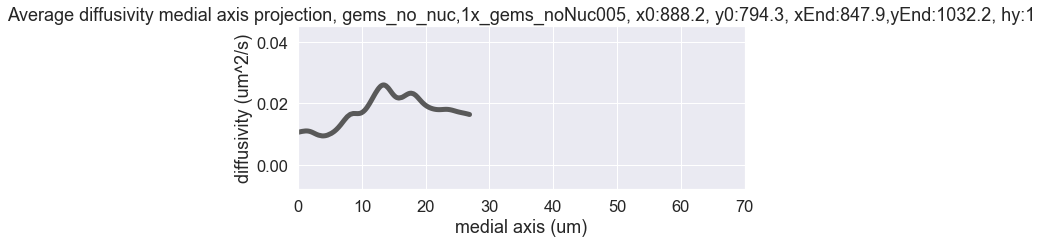

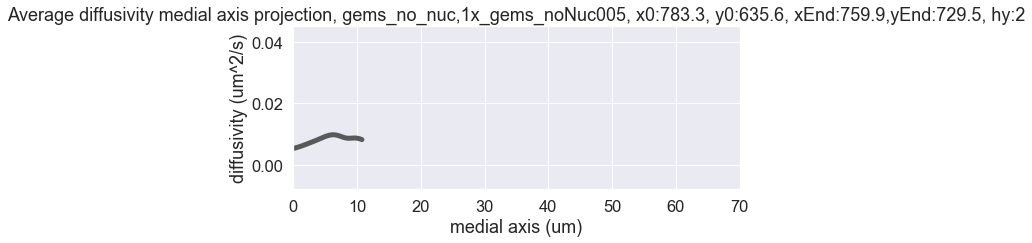

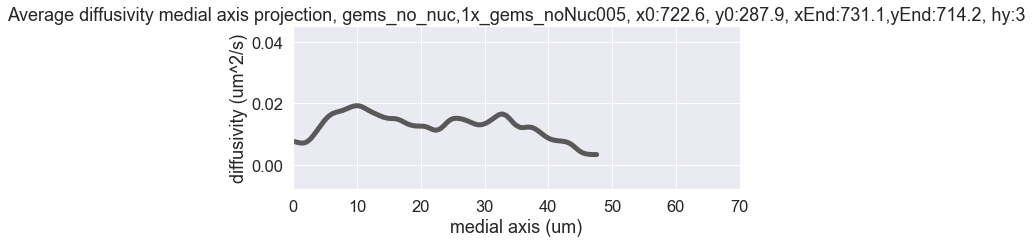

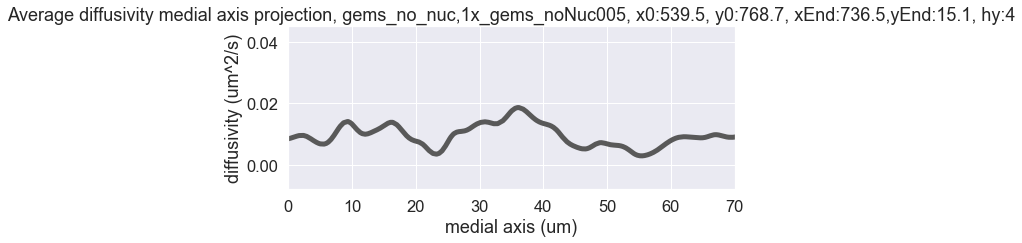

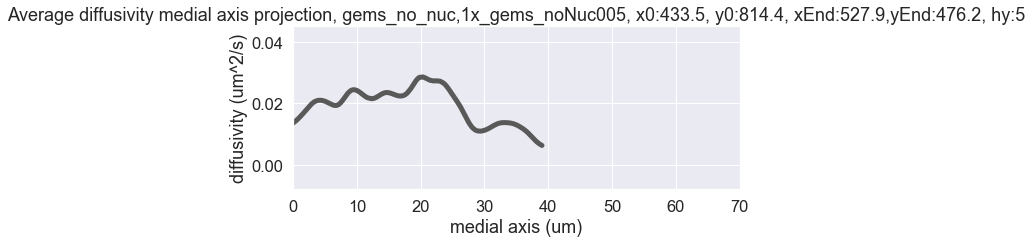

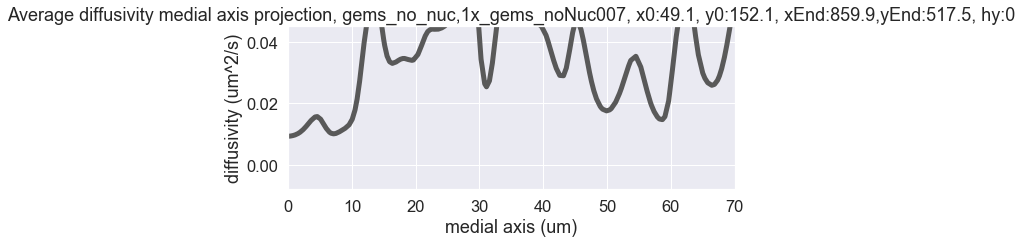

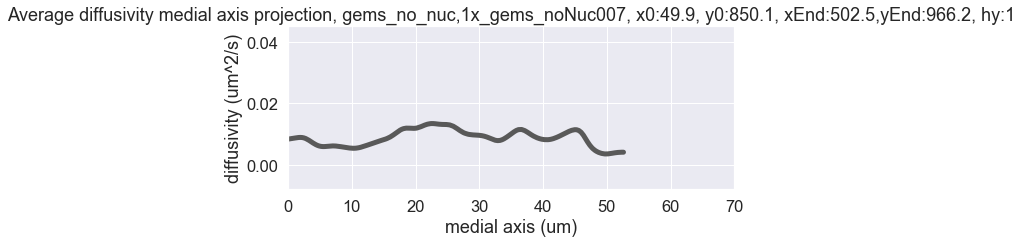

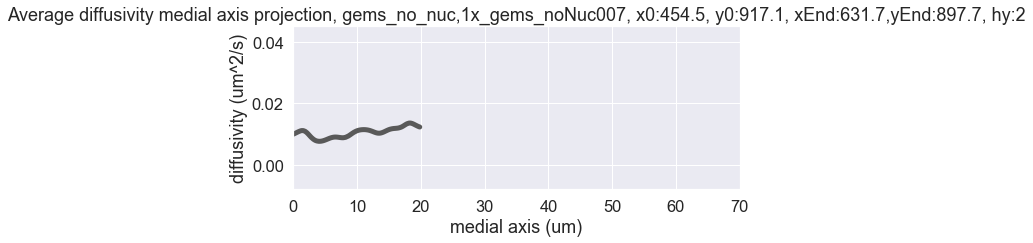

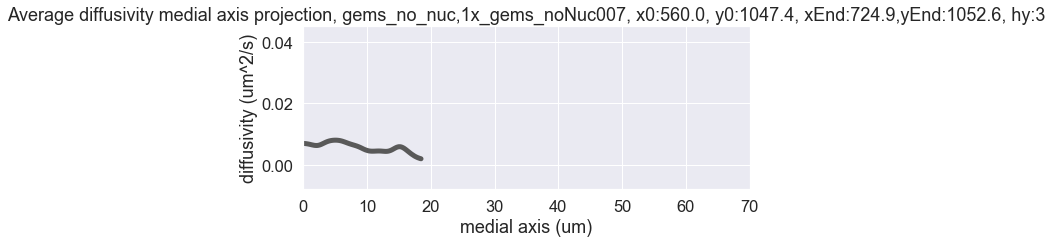

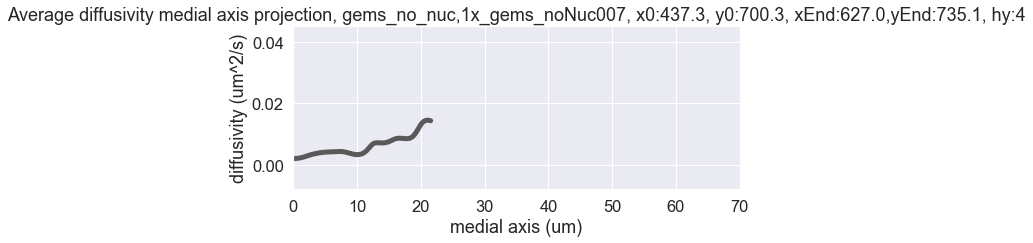

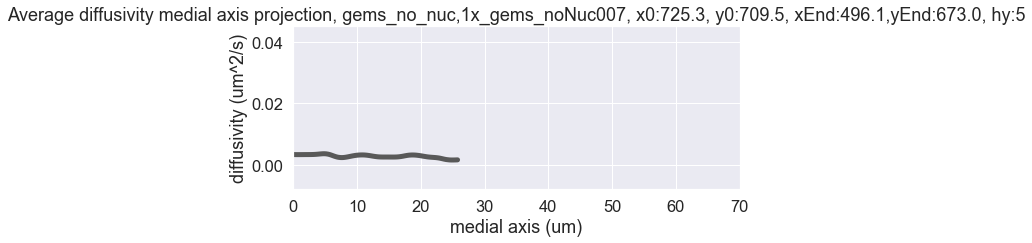

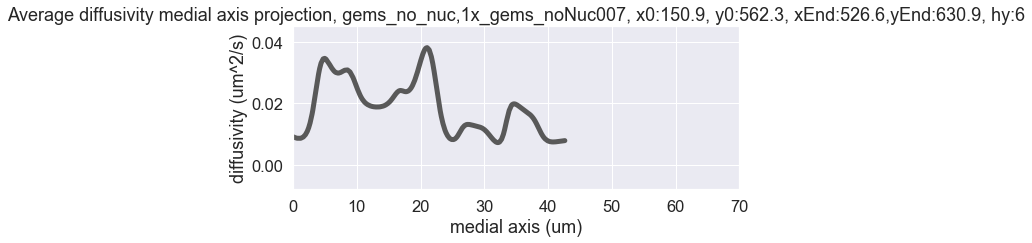

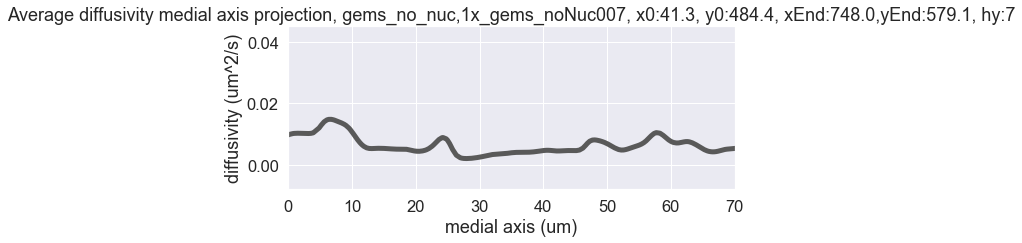

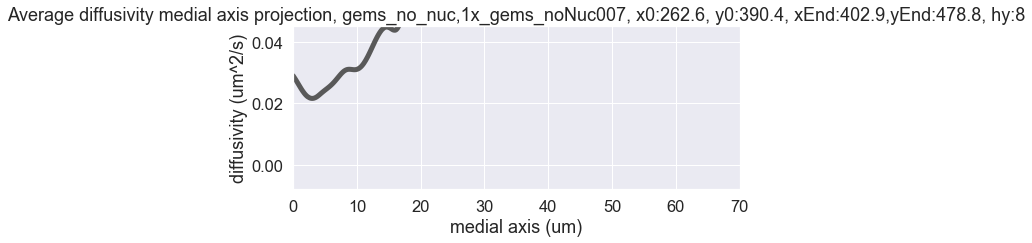

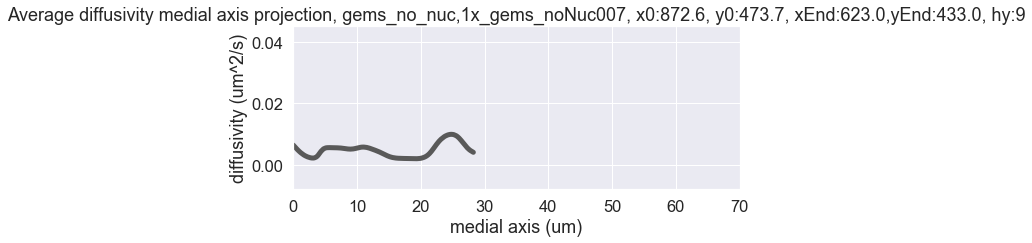

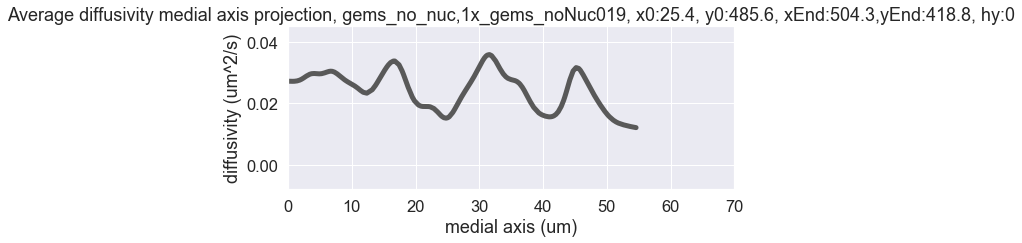

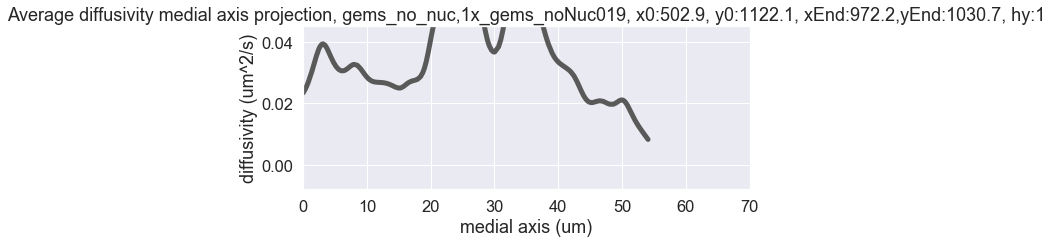

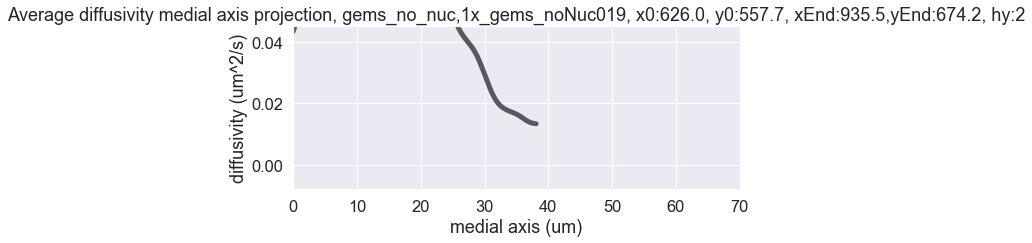

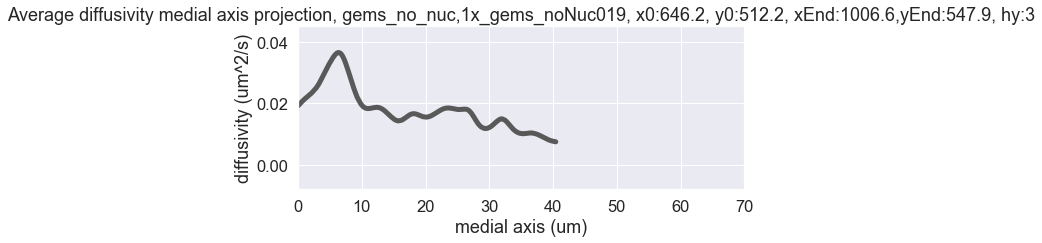

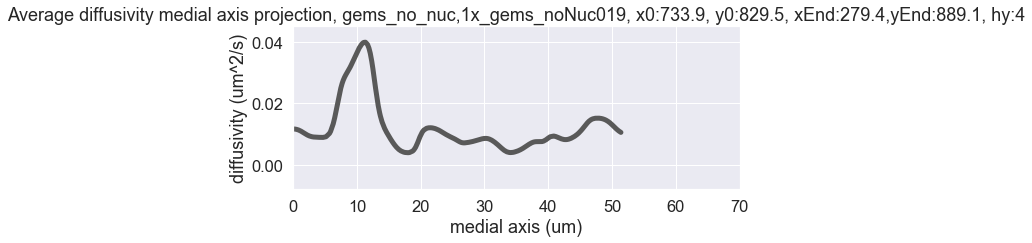

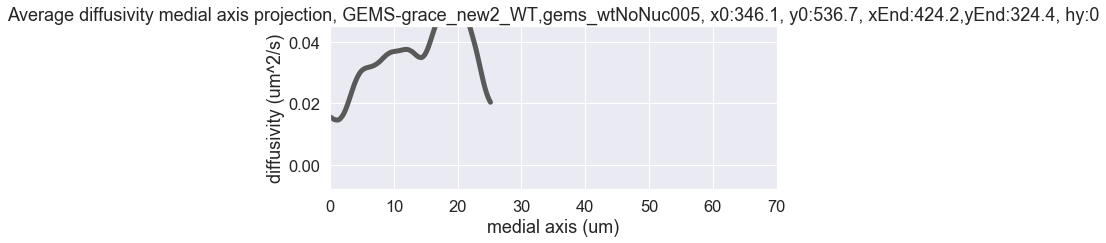

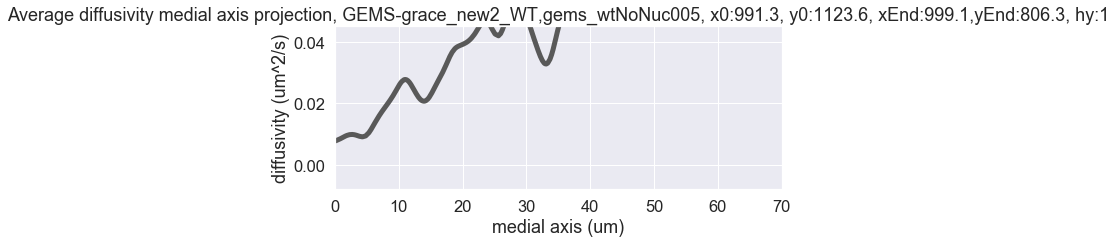

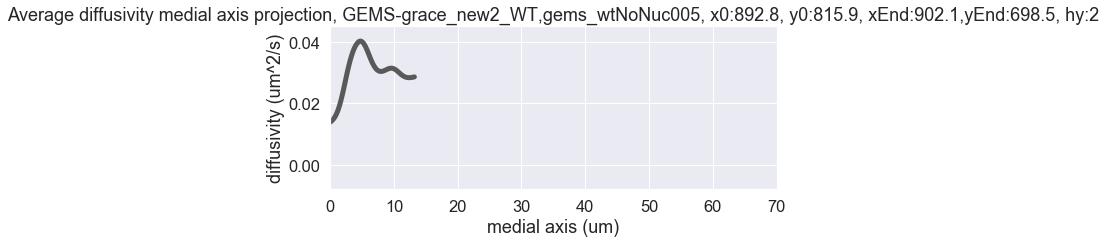

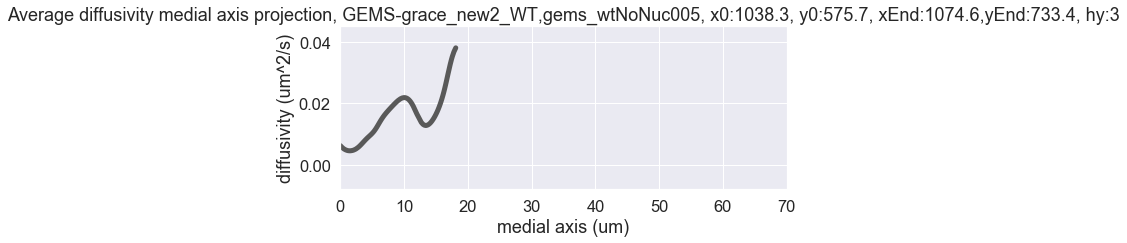

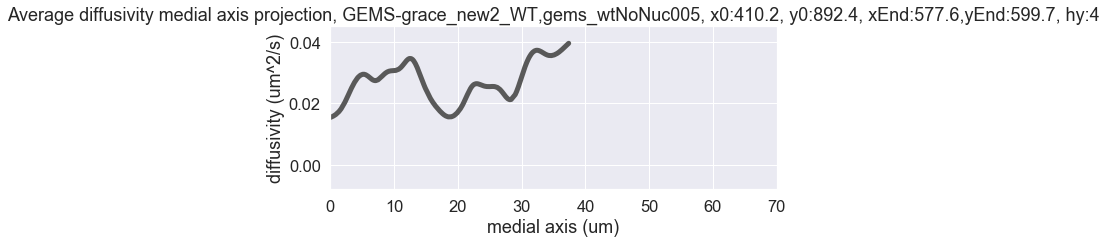

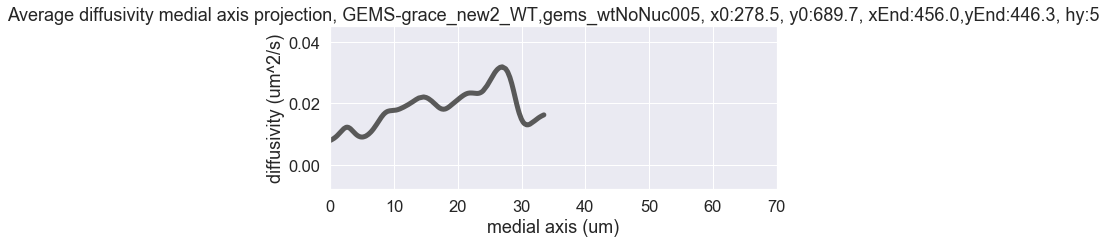

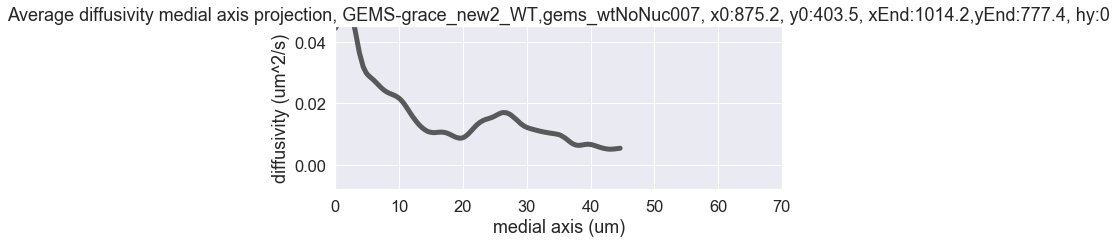

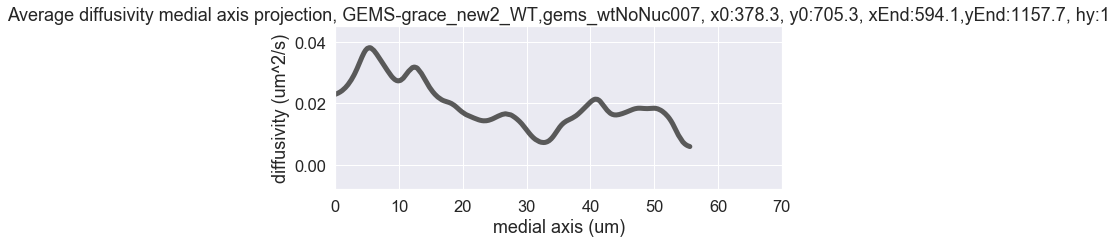

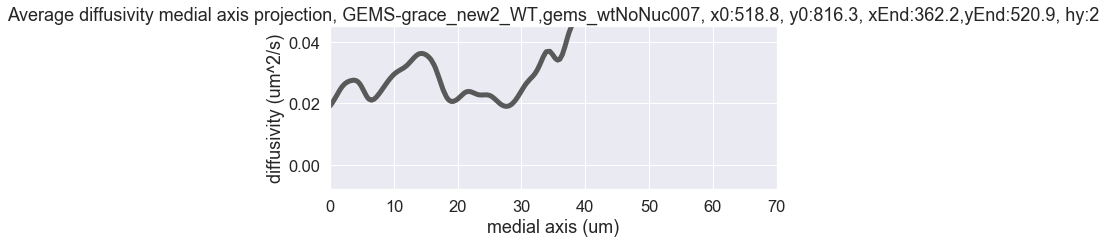

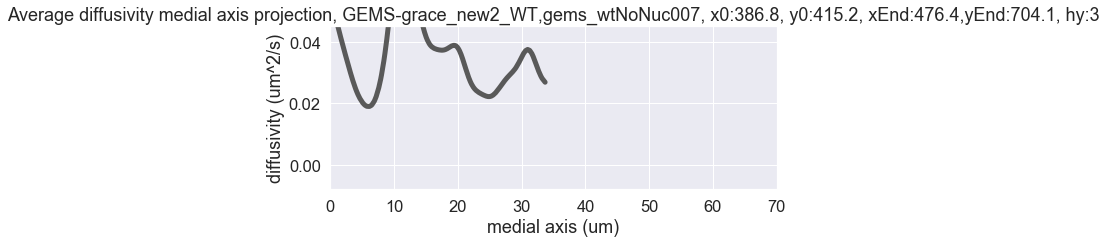

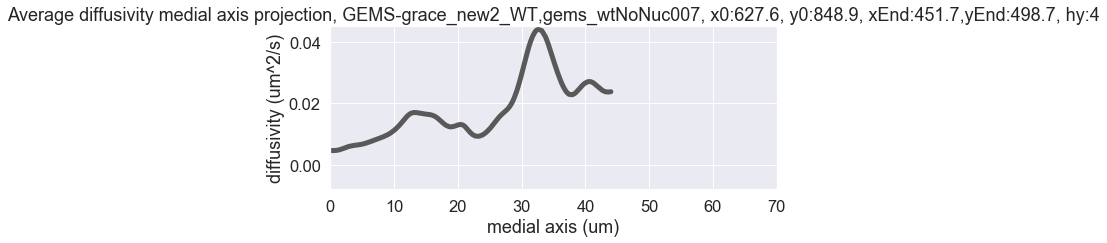

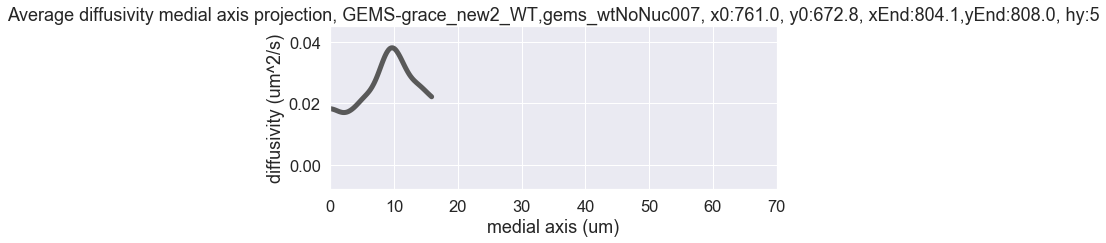

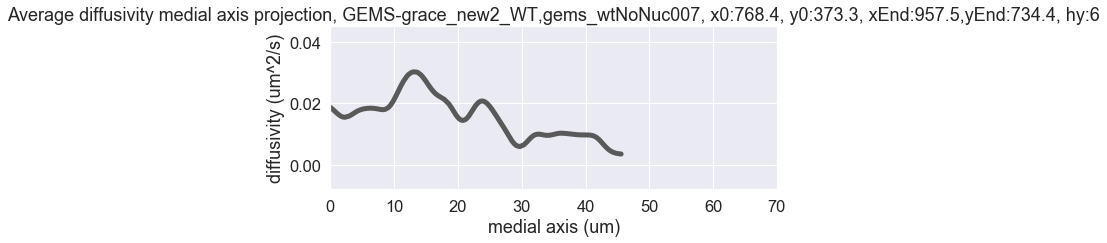

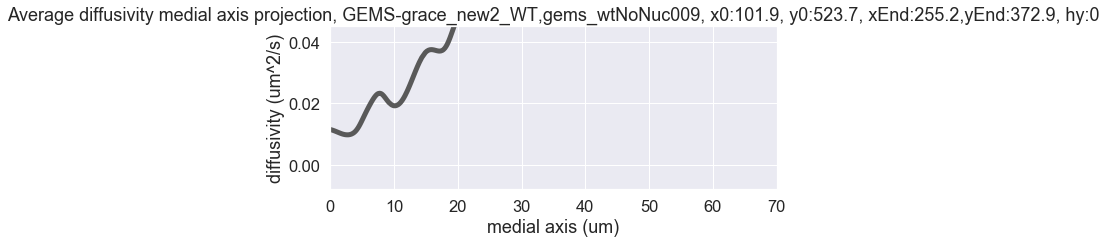

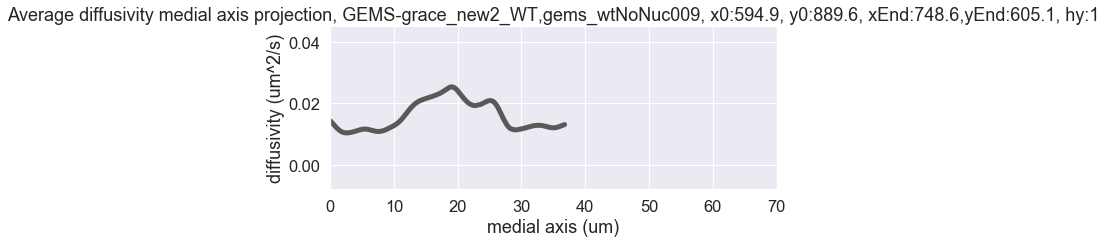

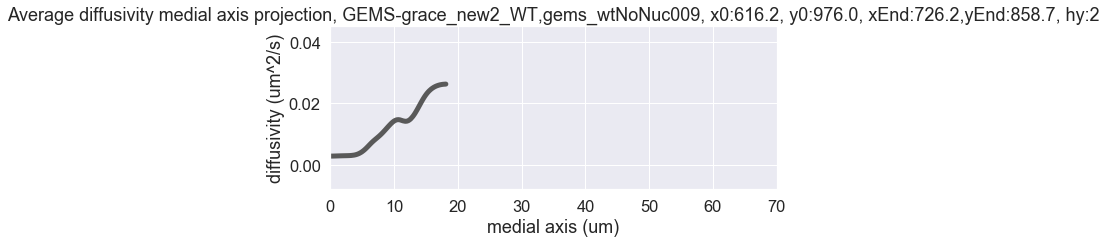

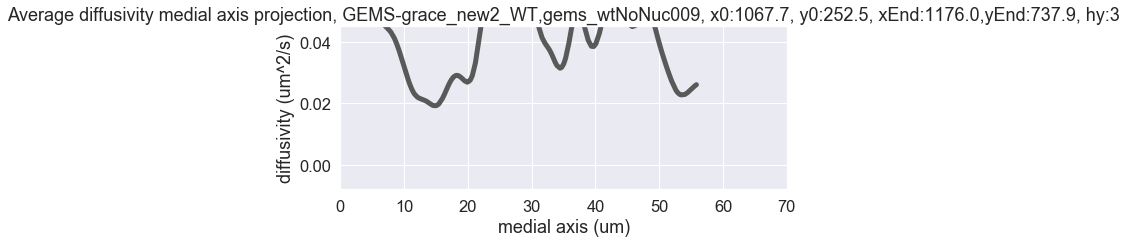

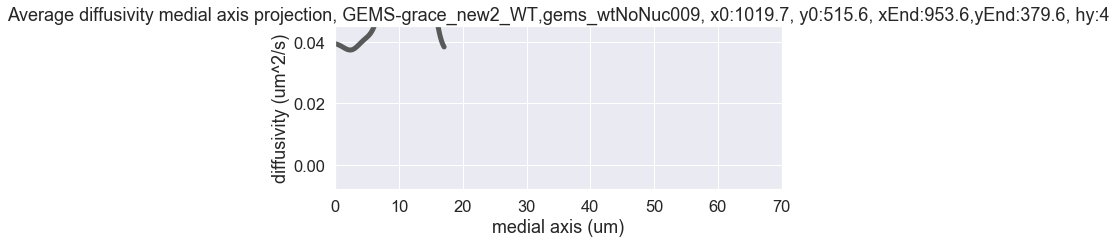

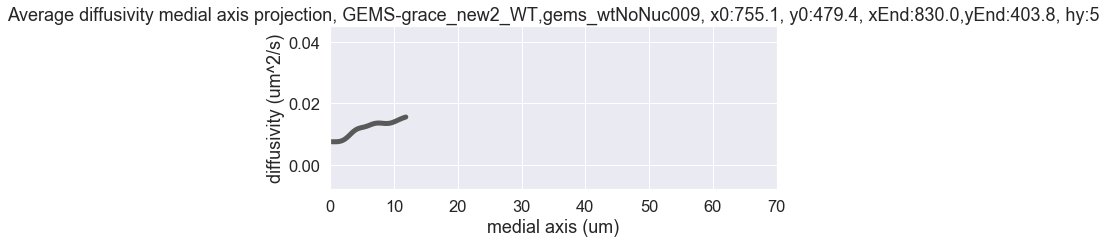

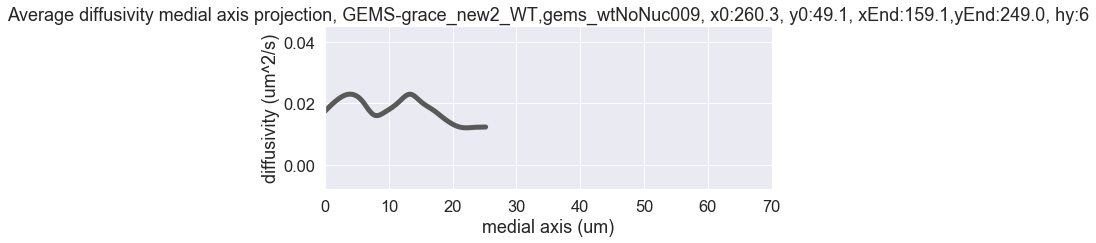

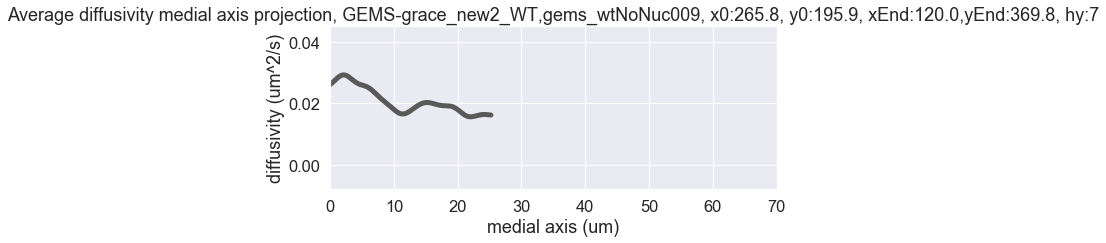

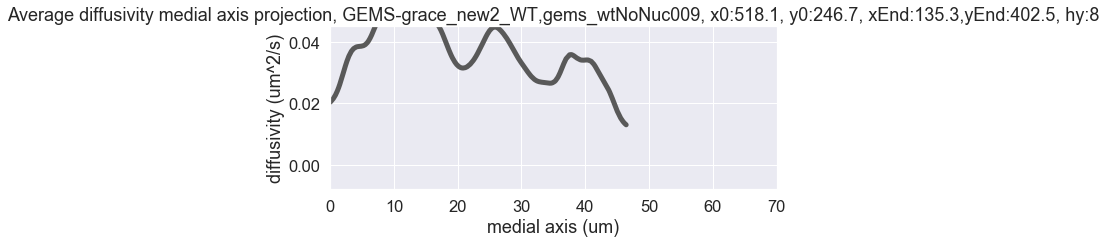

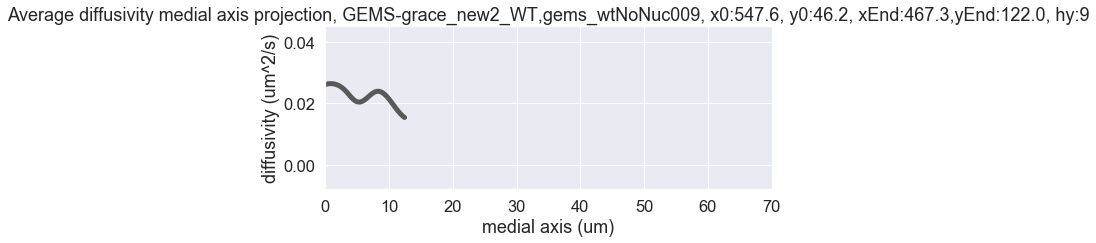

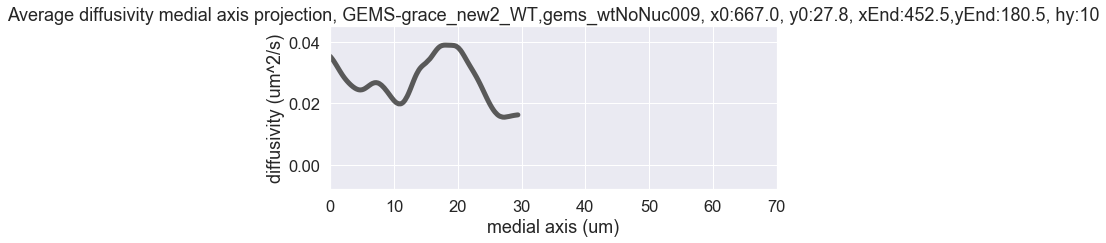

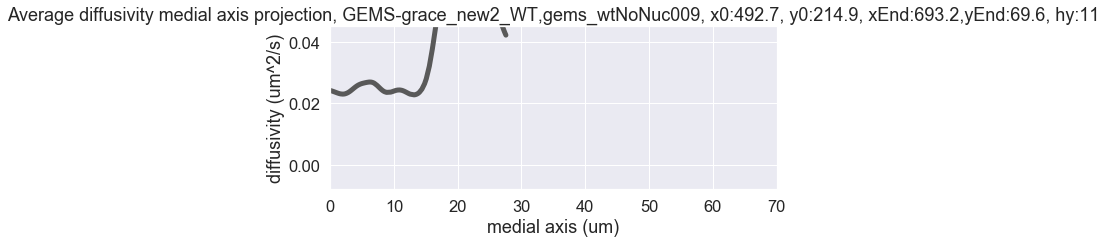

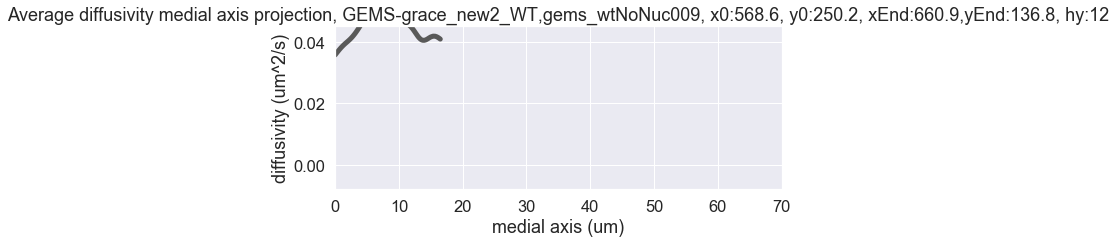

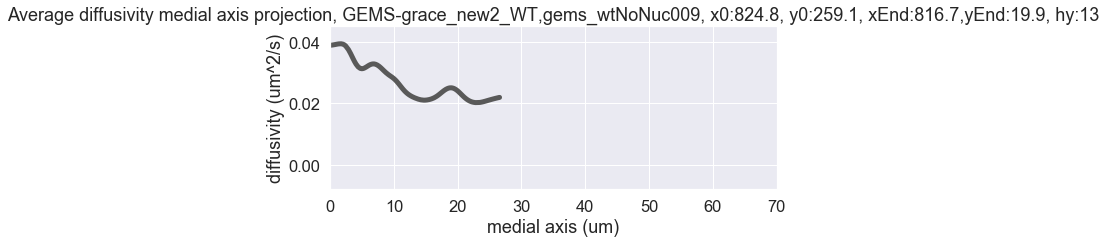

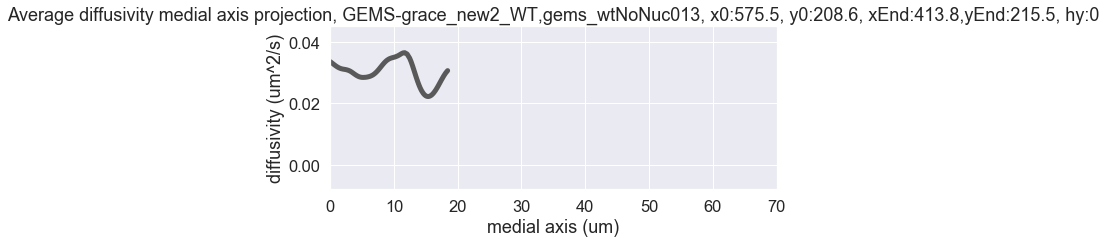

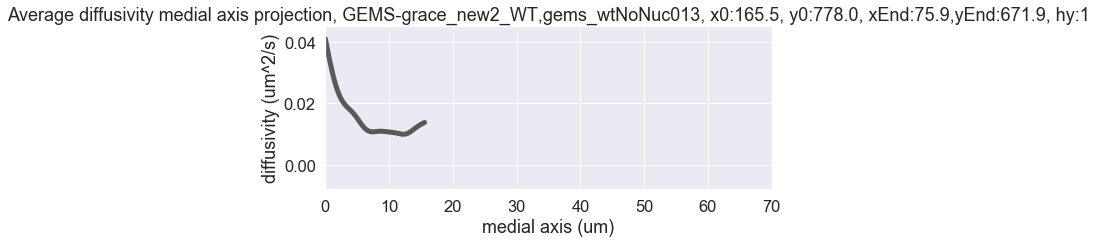

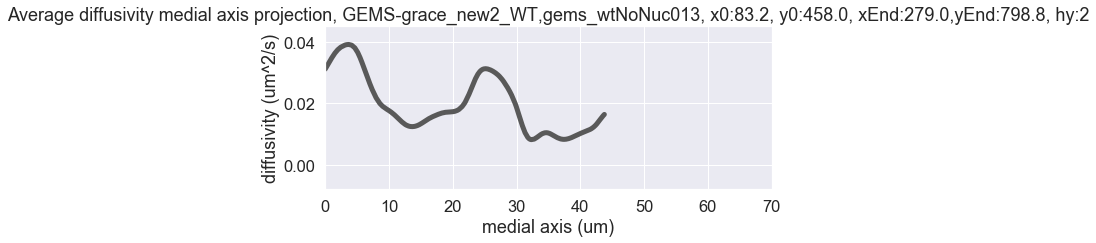

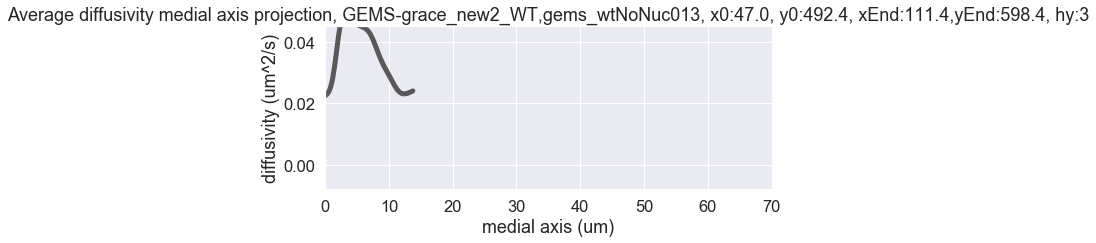

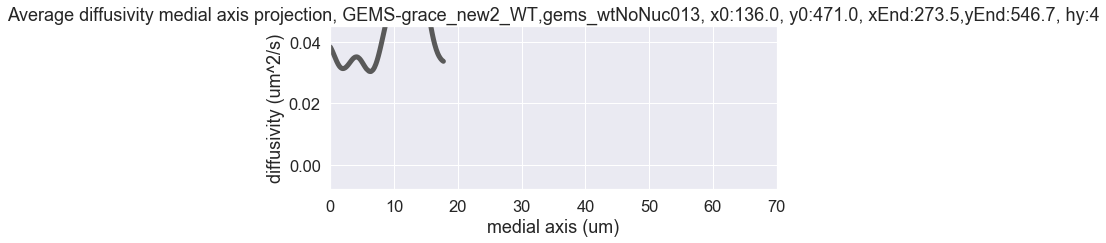

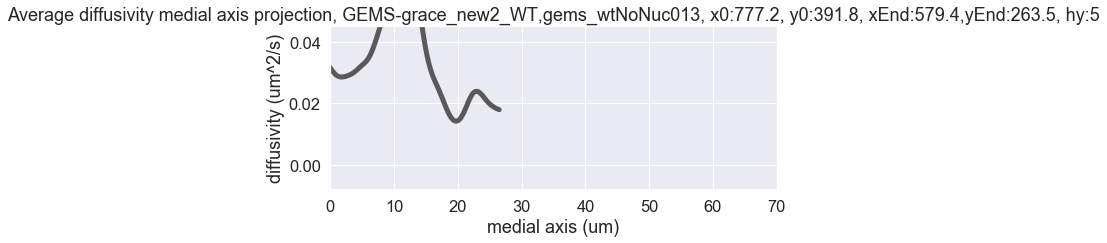

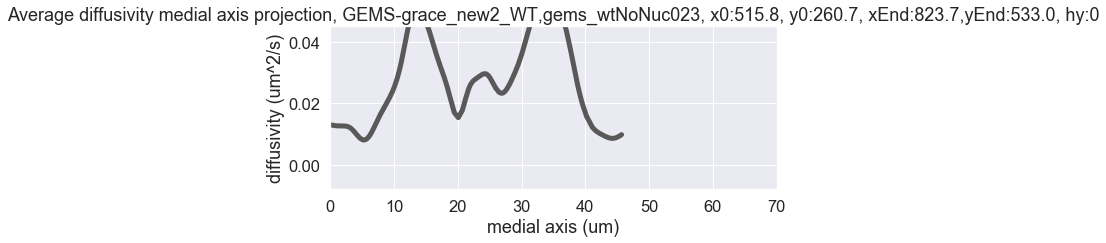

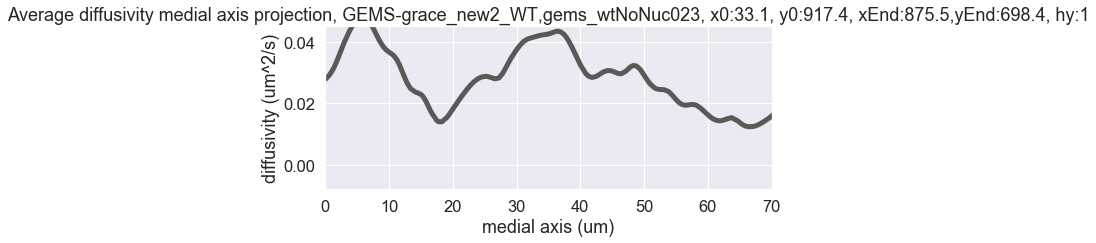

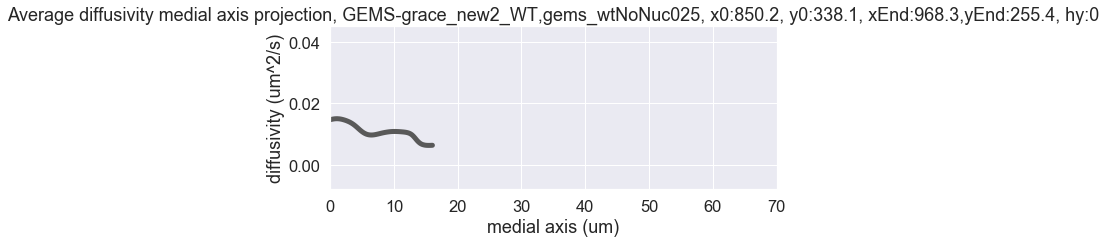

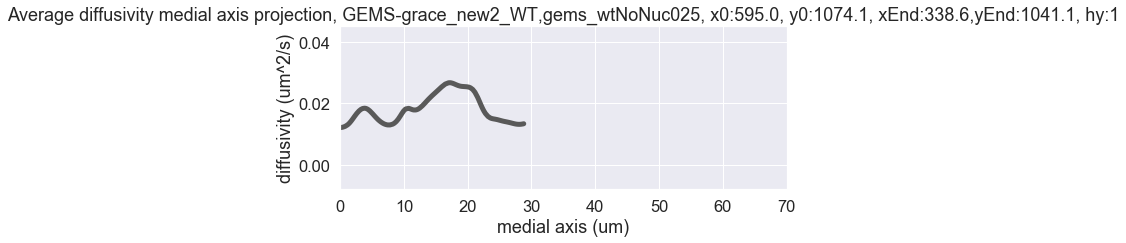

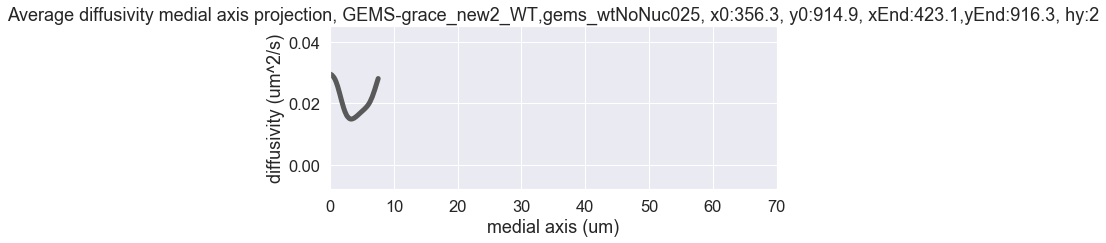

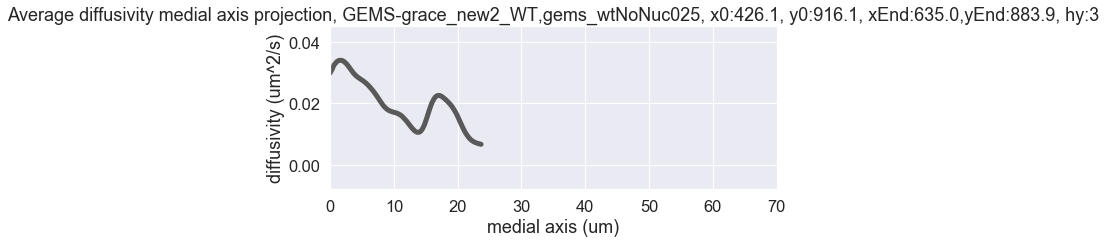

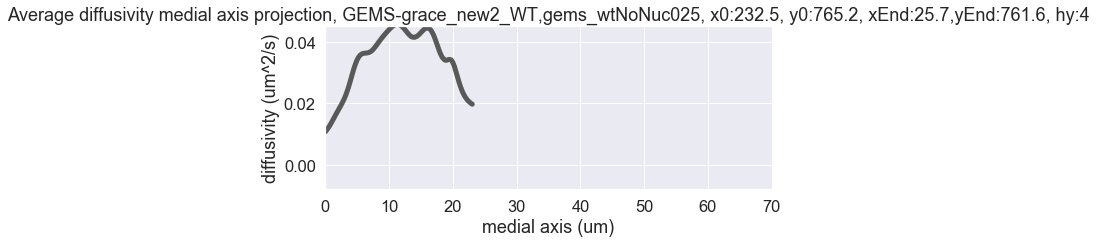

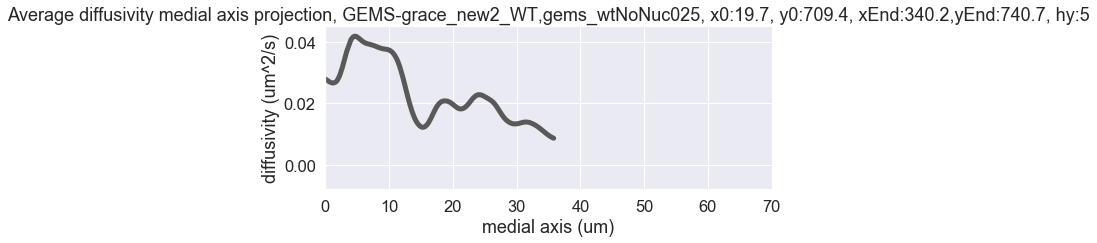

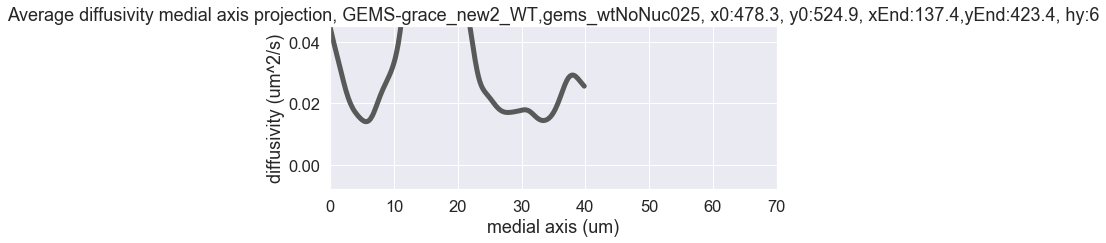

In [25]:
##########################################
d_sets = ['gems_no_nuc','GEMS-grace_new2_WT']
dx = 0.11029266566038132
##########################################
nest = {}
dt_dict = {}
vids = {}
from_cell_all = {}
from_cell_all_length = {}
all_diffs = []
diffs_tips = []
ratio_tip_to_all = []
ratio_all_to_all = []
all_weights = []
weights_tips = []
counter = 0
counter_cell = 0
for d in d_sets:  
    ##########################################
    if d == 'gems_no_nuc':
        dt_dict[d] = {'1x_gems_noNuc007': 0.8597241044044495,
                     '1x_gems_noNuc005': 0.86404949426651,
                     '1x_gems_noNuc019': 0.8585525751113892}
    if d == 'GEMS-grace_new2_WT':
        dt_dict[d] = {'gems_wtNoNuc011': 0.8837366104125977, 
                     'gems_wtNoNuc025': 0.9058094620704651, 
                     'gems_wtNoNuc013': 0.88719642162323, 
                     'gems_wtNoNuc027': 0.8751857280731201, 
                     'gems_wtNoNuc033': 0.8615732192993164, 
                     'gems_wtNoNuc017': 0.8966847062110901, 
                     'gems_wtNoNuc031': 0.8911741971969604, 
                     'gems_wtNoNuc023': 0.9057651162147522, 
                     'gems_wtNoNuc019': 0.8688925504684448, 
                     'gems_wtNoNuc029': 0.8644909262657166, 
                     'gems_wtNoNuc021': 0.8623786568641663, 
                     'gems_wtNoNuc009': 0.858651340007782, 
                     'gems_wtNoNuc007': 0.8886678218841553, 
                     'gems_wtNoNuc005': 0.8625732660293579, 
                     'gems_wtNoNuc003': 0.8593537211418152, 
                     'gems_wtNoNuc015': 0.8786670565605164, 
                     'gems_wtNoNuc001': 0.8855053186416626}
    ########################################### 
    nest[d] = np.load('axialData-{0}.npy'.format(d), allow_pickle=True,
               encoding='latin1')[0] #file was made w/ python 2
    vids[d] = nest[d].keys()
    sorted(vids[d])
    ######################################################################
    ### hand chosen videos and time point:
    if d == 'gems_no_nuc':
        vidSub = ['1x_gems_noNuc005','1x_gems_noNuc007','1x_gems_noNuc019']
        frame = 50
    if d == 'GEMS-grace_new2_WT':
        vidSub = ['gems_wtNoNuc005','gems_wtNoNuc007','gems_wtNoNuc009','gems_wtNoNuc013',
                  'gems_wtNoNuc023','gems_wtNoNuc025'] 
        frame = 50
    ########## 
    for v in vidSub: 
        counter += 1
        diff_from_cell = []
        length_from_cell = []
        hy_diff_from_cell = []
        hy_CV_from_cell = []
        from_cell_all[v] = {}
        from_cell_all_length[v] = {}
        counter_hy = 0
        for hy in arange(len(nest[d][v]['diffusivity'])): 
            tip_loc = []
            ############################
            if v == '1x_gems_noNuc019':
                if hy == 5:
                    continue
            if len(nest[d][v]['diffusivity'][hy]) == 1:
                continue
            if len(nest[d][v]['arcLength'][hy]) < 10: 
                continue
            ############################
            diffs_load = nest[d][v]['diffusivity'][hy][frame,:]*dx**2/dt_dict[d][v]                                                                                     
            diffs = array([i for i in diffs_load if i!=0]) 
            AL = abs(nest[d][v]['arcLength'][hy])*dx 
            if len(diffs_load) == 0: 
                continue
            #############################################################
            ### x,y positions of beginning and end of medial axis signal:
            x0 = truncate(nest[d][v]['axisPosition'][hy][0][0],1)
            xEnd = truncate(nest[d][v]['axisPosition'][hy][0][-1],1)
            y0 = truncate(nest[d][v]['axisPosition'][hy][1][0],1)
            yEnd = truncate(nest[d][v]['axisPosition'][hy][1][-1],1)
            ##############################################################
            ### getting weights based on distances b/w medial axis points:
            diff_AL = np.diff(AL) #distance b/w medial axis points
            weights = np.zeros(len(AL))
            weights[0] = diff_AL[0] #beginning and end points are weighted by neighboring 
            weights[-1] = diff_AL[-1]                                           #distance
            for i, val in enumerate(weights[1:-1],1): #middle points weighted by average of
                weights[i] = (diff_AL[i-1] + diff_AL[i])/2   #their two neighboring distances
            ###############################################################################
            ### data for fig 3 and 4
            diff_from_cell = append(diff_from_cell, diffs) #diffusivity values from all hypha in
                                                                              #current cell
            length_from_cell = append(length_from_cell, np.max(AL))
            hy_diff_from_cell = append(hy_diff_from_cell, np.average(diffs,weights=weights)) 
            hy_CV_from_cell = append(hy_CV_from_cell, np.std(diffs)/
                                     np.average(diffs, weights=weights))                                                                                
            all_diffs = append(all_diffs, diffs) #all diffusivity values from all cells
            all_weights = append(all_weights, weights)
            #################################################
            #### Hand segmented medial axis location of tips:
            if v == 'gems_wtNoNuc025':
                tip_loc = []
            if v == 'gems_wtNoNuc023':
                tip_loc = []
            if v == 'gems_wtNoNuc013':
                if counter_hy == 0:
                    tip_loc = 0
                if counter_hy == 1:
                    tip_loc = []
                if counter_hy == 2:
                    tip_loc = -1
                if counter_hy == 3:
                    tip_loc = []
                if counter_hy == 4:
                    tip_loc = -1
                if counter_hy == 5:
                    tip_loc = []
            if v == 'gems_wtNoNuc009':
                if counter_hy == 0:
                    tip_loc = 0
                if counter_hy == 1:
                    tip_loc = []
                if counter_hy == 2:
                    tip_loc = []
                if counter_hy == 3:
                    tip_loc = -1
                if counter_hy == 4:
                    tip_loc = 0
                if counter_hy == 5:
                    tip_loc = 0
                if counter_hy == 6:
                    tip_loc = -1
                if counter_hy == 7:
                    tip_loc = -1
                if counter_hy == 8:
                    tip_loc = -1
                if counter_hy == 9:
                    tip_loc = -1
                if counter_hy == 10:
                    tip_loc = -1
                if counter_hy == 11:
                    tip_loc = 0
                if counter_hy == 12:
                    tip_loc = 0
                if counter_hy == 13:
                    tip_loc = 0
            if v == 'gems_wtNoNuc007':
                if counter_hy == 0:
                    tip_loc = []
                if counter_hy == 1:
                    tip_loc = -1
                if counter_hy == 2:
                    tip_loc = 0
                if counter_hy == 3:
                    tip_loc = []
                if counter_hy == 4:
                    tip_loc = 0
                if counter_hy == 5:
                    tip_loc = -1
                if counter_hy == 6:
                    tip_loc = []
            if v == 'gems_wtNoNuc005':
                if counter_hy == 0:
                    tip_loc = 0
                if counter_hy == 1:
                    tip_loc = 0
                if counter_hy == 2:
                    tip_loc = 0
                if counter_hy == 3:
                    tip_loc = -1
                if counter_hy == 4:
                    tip_loc = 0
                if counter_hy == 5:
                    tip_loc = 0
            if v == '1x_gems_noNuc019':
                if counter_hy == 0:
                    tip_loc = -1
                if counter_hy == 1:
                    tip_loc = []
                if counter_hy == 2:
                    tip_loc = -1
                if counter_hy == 3:
                    tip_loc = -1
                if counter_hy == 4:
                    tip_loc = 0
                if counter_hy == 5:
                    tip_loc = []
            if v == '1x_gems_noNuc005':
                if counter_hy == 0:
                    tip_loc = 0
                if counter_hy == 1:
                    tip_loc = 0
                if counter_hy == 2:
                    tip_loc = 0
                if counter_hy == 3:
                    tip_loc = 0
                if counter_hy == 4:
                    tip_loc = []
                if counter_hy == 5:
                    tip_loc = -1
            if v == '1x_gems_noNuc007':
                if counter_hy == 0:
                    tip_loc = 0
                if counter_hy == 1:
                    tip_loc = 0
                if counter_hy == 2:
                    tip_loc = 0
                if counter_hy == 3:
                    tip_loc = 0
                if counter_hy == 4:
                    tip_loc = 0
                if counter_hy == 5:
                    tip_loc = -1
                if counter_hy == 6:
                    tip_loc = []
                if counter_hy == 7:
                    tip_loc = []
                if counter_hy == 8:
                    tip_loc = 0
                if counter_hy == 9:
                    tip_loc = []
            #######################################################
            ### data for fig 4:
            if tip_loc == 0: #if tip is the beginning of medial axis signal:
                idx_tip = AL < (AL[tip_loc]+1) #getting AL incidices of tip region, first um
                                                                                #of signal 
                diffs_tips = append(diffs_tips, diffs[idx_tip]) #diffusivity values at tips,
                                                                              #all cells
                weights_tips = append(weights_tips, weights[idx_tip])
                ratio_tip_to_all = append(ratio_tip_to_all, np.average(diffs[idx_tip], 
                                        weights=weights[idx_tip])/np.average(diffs,
                                                                            weights=weights))
#                 fig = plt.figure(figsize=(8,3))
#                 plot(AL, diffs_load, linewidth=3,color=[0.35,0.35,0.35])
#                 plot(AL[idx_tip], diffs_load[idx_tip], linewidth=2,c='r')
            if tip_loc == -1: #if tip is the end of medial axis signal:
                idx_tip = AL > (AL[tip_loc]-1) #getting AL incidices of tip region, last um 
                                                                               #of signal
                diffs_tips = append(diffs_tips, diffs[idx_tip])
                weights_tips = append(weights_tips, weights[idx_tip])
                ratio_tip_to_all = append(ratio_tip_to_all, np.average(diffs[idx_tip], 
                                        weights=weights[idx_tip])/np.average(diffs,
                                                                            weights=weights))
#                 fig = plt.figure(figsize=(8,3))
#                 plot(AL, diffs_load, linewidth=3,color=[0.35,0.35,0.35])
#                 plot(AL[idx_tip], diffs_load[idx_tip], linewidth=2,c='r')
            if tip_loc == []: #if the medial axis signal does not contain a tip:
                idx_tip = []
            for i,val in enumerate(diffs):
                ratio_all_to_all = append(ratio_all_to_all,val/
                                       np.average(diffs, weights=weights))
            ############################
            ### medial axis plots for figs 4B and 5D
            fig = plt.figure(figsize=(8,3)) 
            fig.patch.set_facecolor('xkcd:white')
            sns.set(font_scale=1.5)
            xlabel('medial axis (um)')
            ylabel('diffusivity (um^2/s)')
            title('Average diffusivity medial axis projection, {0},{1}, x0:{2}, y0:{3}, xEnd:{4},yEnd:{5}, hy:{6}'.format(d,v,x0,y0,xEnd,yEnd,counter_hy))
            xlim([0,70]) 
            ############## 5D:
            ylim([-0.008,0.045]) 
            plot(AL, diffs_load, linewidth=5,color=[0.35,0.35,0.35]) 
#             fig.savefig('medAxis{0}{1}{2}.pdf'.format(d,v,counter_hy)) 
            ############### 4B:  
#             ylim([-0.0065,0.03]) 
#             plot(AL, diffs_load, linewidth=3,color=[0.35,0.35,0.35]) #fig 5D: lw 4, B: 5
# #             fig.savefig('medAxisLong{0}{1}{2}.pdf'.format(d,v,counter_hy)) #for fig 3B
            #############################
            counter_hy += 1
            ###############
        counter_cell += 1
        from_cell_all[v] = diff_from_cell
        from_cell_all_length[v] = length_from_cell
        ##################################################
#         fig = plt.figure(figsize=(1,6)) 
#         fig.patch.set_facecolor([0.918,0.918,0.949])
        ##################################################
        ### fig 4D:
#         ax = sns.violinplot(data=np.log10(diff_from_cell), color='deepskyblue', linewidth=2.5,
#                                                                 scale='area', inner='box') 
#         yticks([np.log10(0.001), np.log10(0.01), np.log10(0.1)])
#         plt.ylim([-3.5,-0.7])
# #         fig.savefig('diff_from_cell{0}.pdf'.format(counter))
        ##################################################
        # fig 4F:
#         if len(hy_CV_from_cell) >= 5:
#             ax = sns.boxplot(data=hy_CV_from_cell,color=[0.984, 0.8, 0.337],orient='vert',
#                                                                            linewidth=2.5)
#         else:
#             ax = sns.stripplot(data=hy_CV_from_cell, color="k", jitter=0, size=9.5, alpha=0.4) 
#         plt.ylim([-0.08,0.75])
# #         fig.savefig('cvFromHy{0}.pdf'.format(counter))
#         title('cell#{0},n hy={1}'.format(counter_cell,len(hy_CV_from_cell)))
        ##################################################
        ### fig 4E:
#         if len(hy_diff_from_cell) >= 5:
#             ax = sns.boxplot(data=hy_diff_from_cell, color='turquoise',
#                              orient='vert', linewidth=2.5)
#         else:
#             ax = sns.stripplot(data=hy_diff_from_cell, color="k", jitter=0, 
#                                size=9.5, alpha=0.4)
#         plt.ylim([-0.005,0.055])
#         fig.savefig('diffFromHy{0}.pdf'.format(counter))

Text(0, 0.5, 'normalized counts')

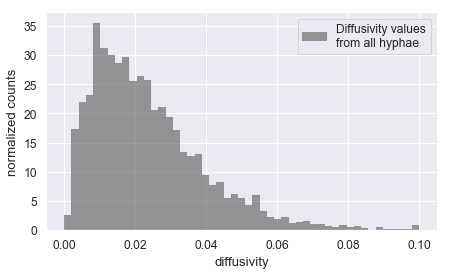

In [17]:
### fig 4C:
fig = plt.figure(1,figsize=(7,4))
sns.set(font_scale=1.1)
######
plt.hist(np.clip(all_diffs,0,0.1), color=[0.35,0.35,0.35], bins=linspace(0,0.1,50), 
         lw=0.4, alpha=.6, weights=all_weights, density=True, histtype='stepfilled', 
         linewidth=0.05, edgecolor=[0.55,0.55,0.55], 
         label='Diffusivity values\nfrom all hyphae')
######
plt.legend()
xlabel('diffusivity')
ylabel('normalized counts')
# fig.savefig('allDiffsNoTips.pdf')

Text(0, 0.5, 'normalized counts')

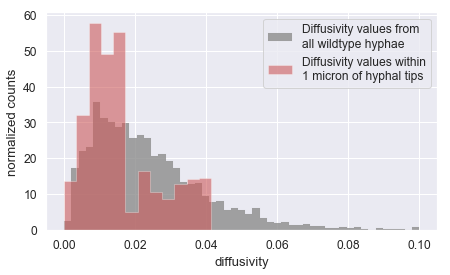

In [18]:
### fig 4E
fig = plt.figure(1,figsize=(7,4))
sns.set(font_scale=1.1)
###########
plt.hist(np.clip(all_diffs,0,0.1), color=[0.55,0.55,0.55], bins=linspace(0,0.1,50), lw=0.4,
         alpha=.8, weights=all_weights, density=True, histtype='stepfilled', linewidth=0.05,
         edgecolor=[0.55,0.55,0.55], label='Diffusivity values from\nall wildtype hyphae')
plt.hist(np.clip(diffs_tips,0,0.1),color='indianred',bins=linspace(0,0.1,30),lw=0.4,
         alpha=0.6, weights=weights_tips, density=True, histtype='stepfilled', linewidth=0.5,
         label='Diffusivity values within\n1 micron of hyphal tips',edgecolor='w')
###########
plt.legend()
xlabel('diffusivity')
ylabel('normalized counts')
# fig.savefig('allDiffs.pdf')

/Users/gracemclaughlin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(-0.25, 3.5)

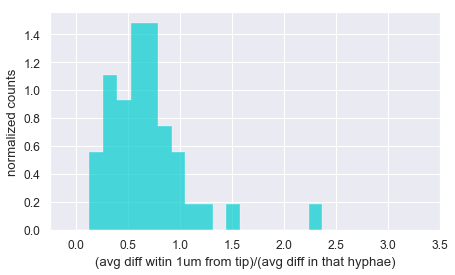

In [23]:
### fig 4F
fig = plt.figure(1,figsize=(7,4))
########
plt.hist(ratio_tip_to_all,color='darkturquoise',lw=0.4,alpha=0.7,bins=linspace(0,2.5,20),
        histtype='stepfilled',normed=True,label='Ratio of Diffusivity at tips')
########
xlabel('(avg diff witin 1um from tip)/(avg diff in that hyphae)')
ylabel('normalized counts')
xlim(-0.25,3.5)
# fig.savefig('ratio.pdf')
# plt.legend()

In [19]:
#for table 1
v = ['1x_gems_noNuc005', '1x_gems_noNuc007', '1x_gems_noNuc019', 'gems_wtNoNuc005', 
     'gems_wtNoNuc007', 'gems_wtNoNuc009', 'gems_wtNoNuc013', 'gems_wtNoNuc023', 
     'gems_wtNoNuc025']
n = 3

mat_p_vals = np.zeros((len(v),len(v)))
mat_D_vals = np.zeros((len(v),len(v)))
for i in np.arange(len(v)):
    for j in np.arange(len(v)):
        all_p = []
        all_D = []
        for k in np.arange(1000):
            ith_dist = np.random.choice(from_cell_all[v[i]], size=int(np.round(
                                                    np.sum(from_cell_all_length[v[i]])/n)), 
                                                                               replace=True)
            jth_dist = np.random.choice(from_cell_all[v[j]], size=int(np.round(
                                                    np.sum(from_cell_all_length[v[j]])/n)), 
                                                                               replace=True)
            D, p = scipy.stats.ks_2samp(ith_dist, jth_dist)
            all_p = append(all_p, p)
            all_D = append(all_D, D)
        mat_p_vals[i,j] = np.mean(all_p)
        mat_D_vals[i,j] = np.mean(all_D)
# numpy.savetxt("wt_cell_to_cell_P.csv", mat_p_vals, delimiter=",")
# numpy.savetxt("wt_cell_to_cell_D.csv", mat_D_vals, delimiter=",")

In [20]:
#table 2, bottom
v = ['1x_gems_noNuc005', '1x_gems_noNuc007', '1x_gems_noNuc019', 'gems_wtNoNuc005', 
     'gems_wtNoNuc007', 'gems_wtNoNuc009', 'gems_wtNoNuc013', 'gems_wtNoNuc023', 
     'gems_wtNoNuc025']

all_len = np.zeros(9)
for i in np.arange(9):
    all_len[i] = np.sum(from_cell_all_length[v[i]])
all_len = np.sum(all_len)
    
n = 3
all_p = []
for k in np.arange(1000):  
    temp_all = np.random.choice(ratio_all_to_all, size=int(all_len/n) ,replace=True)
    temp_tips = np.random.choice(ratio_tip_to_all, size=41 ,replace=True)
    D, p = scipy.stats.ks_2samp(temp_all, temp_tips)
    all_p = append(all_p, p)
avg_p = np.mean(all_p)